In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from fastai.text.all import *
from fastai.callback.fp16 import *
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
set_seed(12)

In [3]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')
df_sample = pd.read_csv('../data/sample_submission.csv')

In [4]:
display(df_train.shape)
display(df_train.head(10))

(2834, 6)

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,"When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.\nThe floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.\nAt each end of the room, on the wall, hung a beautiful bear-skin rug.\nThe...",-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewhat silent, her eyes resting on Dolly with a wistful, uncertain expression. She wanted to give the child the pleasure she craved, but she had hard work to bring herself to the point of overcoming her own objections.\nAt last, however, when the meal was nearly over, she smiled at her little daughter, and said, ""All right, Dolly, you may go.""\n""Oh, mother!"" Dolly cried, overwhelmed with sudden delight. ""Really?\nOh, I am so glad! Are you sure you're willing?""\n""I've persuaded myself to be willing, against my will,"" returned Mrs. Fayre, whimsically...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as quickly as it came, and two days after their sleigh ride there was scarcely a vestige of white on the ground. Tennis was again possible and a great game was in progress on the court at Pine Laurel. Patty and Roger were playing against Elise and Sam Blaney, and the pairs were well matched.\nBut the long-contested victory finally went against Patty, and she laughingly accepted defeat.\n""Only because Patty's not quite back on her game yet,"" Roger defended; ""this child has been on the sick list, you know, Sam, and she isn't up to her own mark.""\n""We...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,"And outside before the palace a great garden was walled round, filled full of stately fruit-trees, gray olives and sweet figs, and pomegranates, pears, and apples, which bore the whole year round. For the rich south-west wind fed them, till pear grew ripe on pear, fig on fig, and grape on grape, all the winter and the spring. And at the farther end gay flower-beds bloomed through all seasons of the year; and two fair fountains rose, and ran, one through the garden grounds, and one beneath the palace gate, to water all the town. Such noble gifts the heavens had given to Alcinous the wise.\n...",-1.054013,0.450007
4,37c1b32fb,NaN,NaN,"Once upon a time there were Three Bears who lived together in a house of their own in a wood. One of them was a Little, Small, Wee Bear; and one was a Middle-sized Bear, and the other was a Great, Huge Bear. They had each a pot for their porridge; a little pot for the Little, Small, Wee Bear; and a middle-sized pot for the Middle Bear; and a great pot for the Great, Huge Bear. And they had each a chair to sit in; a little chair for the Little, Small, Wee Bear; and a middle-sized chair for the Middle Bear; and a great chair for the Great, Huge Bear. And they had each a bed to sleep in; a li...",0.247197,0.510845
5,f9bf357fe,NaN,NaN,"Hal and Chester found ample time to take an inventory of the general's car. It was a huge machine, and besides being fitted up luxuriously was also furnished as an office, that the general might still be at work while he hurried from one part of the field to another when events demanded his immediate presence. Even now, with treachery threatening, and whirling along at a terrific speed, General Joffre, probably because of habit, fell to work sorting papers, studying maps and other drawings.\nFor almost two hours the car whirled along at top speed, and at length pulled up in the rear of an ...",-0.861809,0.480936
6,eaf8e7355,NaN,NaN,"Hal Paine and Chester Crawford were typical American boys. With the f

In [5]:
display(df_test.shape)
display(df_test.head(10))

(7, 4)

,id,url_legal,license,excerpt
0,c0f722661,NaN,NaN,"My hope lay in Jack's promise that he would keep a bright light burning in the upper story to guide me on my course. On a clear night this light was visible from the village, but somehow or other I failed to take into account the state of the weather. The air was full of eddying flakes, which would render the headlight of a locomotive invisible a hundred yards distant. Strange that this important fact never occurred to me until I was fully a fourth of a mile from the village. Then, after looking in vain for the beacon light, the danger of my situation struck me, and I halted.\n""I am certai..."
1,f0953f0a5,NaN,NaN,"Dotty continued to go to Mrs. Gray's every night with the milk. Sometimes Katie went with her, and then they always paused a while under the acorn-tree and played ""King and Queen."" Dotty said she wished they could ever remember to bring their nipperkins, for in that case the milk would taste a great deal more like nectar. The ""nipperkins"" were a pair of handled cups which the children supposed to be silver, and which they always used at table.\nDotty knew she was doing wrong every time she played ""King and Queen."" She knew the milk was not hers, but Mrs. Gray's; still she said to herself, ..."
2,0df072751,NaN,NaN,"It was a bright and cheerful scene that greeted the eyes of Captain Raymond and his son as they entered the parlor of the adjacent cottage.\nIt was strictly a family gathering, yet the room was quite full. Mr. Dinsmore was there with his wife, his daughter Elsie and her children, Edward and Zoe, Elsie Leland with her husband and babe, Violet Raymond with her husband's two little girls, Lulu and Grace, and lastly Rosie and Walter.\nEverybody had a kindly greeting for the captain, and Violet's bright face grew still brighter as she made room for him on the sofa by her side.\n""We were beginni..."
3,04caf4e0c,https://en.wikipedia.org/wiki/Cell_division,CC BY-SA 3.0,"Cell division is the process by which a parent cell divides into two or more daughter cells. Cell division usually occurs as part of a larger cell cycle.\n In eukaryotes, there are two distinct types of cell division: a vegetative division, whereby each daughter cell is genetically identical to the parent cell (mitosis), and a reproductive cell division, whereby the number of chromosomes in the daughter cells is reduced by half, to produce haploid gametes (meiosis). \nMeiosis results in four haploid daughter cells by undergoing one round of DNA replication followed by two divisions: homolo..."
4,0e63f8bea,https://en.wikipedia.org/wiki/Debugging,CC BY-SA 3.0,"Debugging is the process of finding and resolving of defects that prevent correct operation of computer software or a system. Debugging tends to be harder when various subsystems are tightly coupled, as changes in one may cause bugs to emerge in another.\nNumerous books have been written about debugging, as it involves numerous aspects, including interactive debugging, control flow, integration testing, log files, monitoring (application, system), memory dumps, profiling, Statistical Process Control, and special design tactics to improve detection while simplifying changes. The terms ""bug""..."
5,12537fe78,NaN,NaN,"To explain transitivity, let us look first at a totally different example that has a lot to do with transitivity but nothing to do with rationality. A combination of choices is rational if an observer can deduce someone else's preferences (that is, learn what that person likes best, medium, and least) just by observing his choices. Suppose I put your friends Adam and Ben side-by-side and I see that Adam is taller than Ben. Then I put Ben and Charlie side-by-side and I see that Ben is taller than Charlie. Can you tell me who is taller, Adam or Charlie? Adam, of course. How do we know? We si..."
6,965e592c0,https://www.africanstorybook.org/#,CC BY 4.0,"Milka and John are playing in the garden. Her little sister is playing too. 

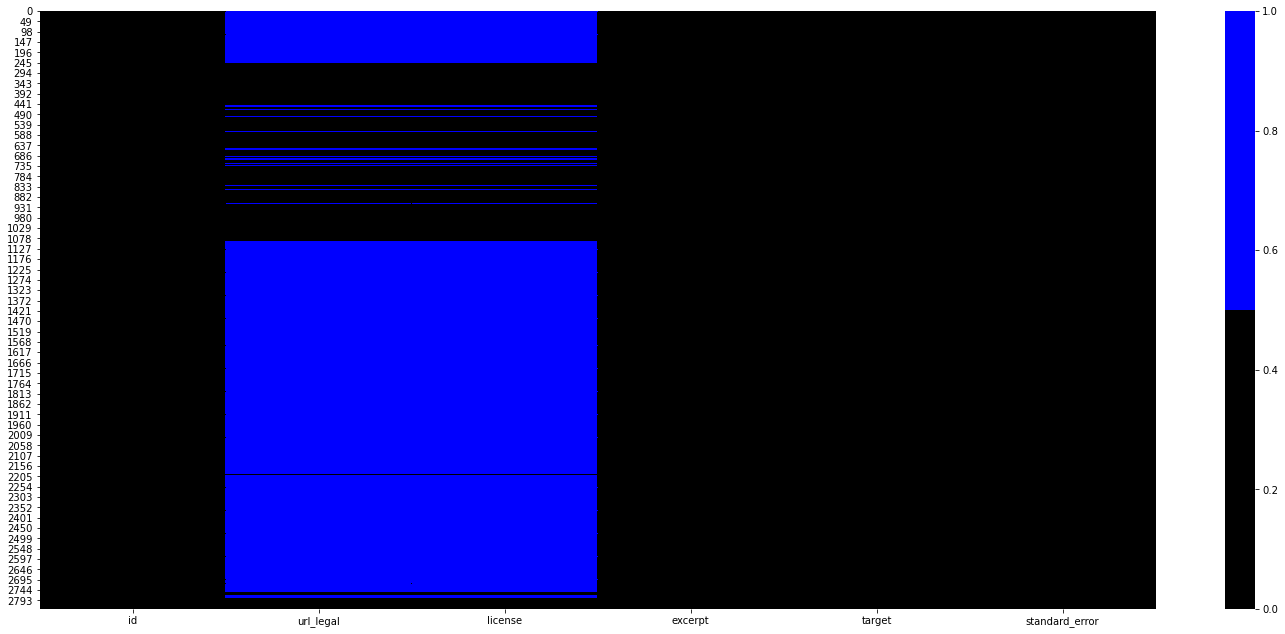

In [6]:
plt.figure(figsize = (25, 11))
sns.heatmap(df_train.isna(), cmap = ['black', 'blue'])

In [7]:
df_train['domain_names'] = df_train.url_legal.apply(lambda x: x if pd.isna(x) else re.findall('.*\://(?:www.)?([^\/]+)', x)[0])

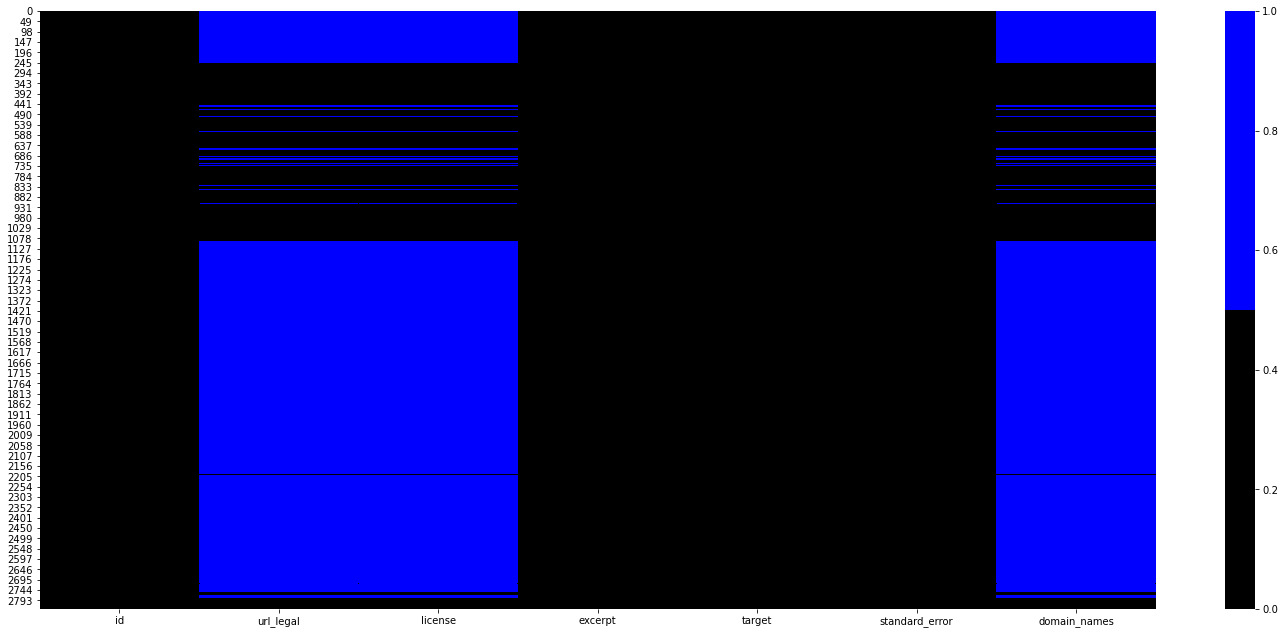

In [8]:
plt.figure(figsize = (25, 11))
sns.heatmap(df_train.isna(), cmap = ['black', 'blue'])

In [9]:
df_test['domain_names'] = df_test.url_legal.apply(lambda x: x if pd.isna(x) else re.findall('.*\://(?:www.)?([^\/]+)', x)[0])

In [10]:
df_train.drop(columns=['url_legal'], axis=1, inplace=True)
df_test.drop(columns=['url_legal'], axis=1, inplace=True)

In [11]:
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,2834,2834,4766cdb83,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
license,830,15,CC BY 4.0,391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
excerpt,2834,2834,"A brown little face, with whiskers. A grave round face, with the same twinkle in its eye that had first attracted his notice. Small neat ears and thick silky hair. It was the Water Rat! Then the two animals stood and regarded each other cautiously. ""Hullo, Mole!"" said the Water Rat. ""Hullo, Rat!"" said the Mole. ""Would you like to come over?"" enquired the Rat presently. ""Oh, its all very well to TALK,"" said the Mole, rather pettishly, he being new to a river and riverside life and its ways.The rat said nothing, but stooped and unfastened a rope and hauled on it; then lightly stepped into a ...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target,2834,NaN,NaN,NaN,-0.959319,1.03358,-3.67627,-1.69032,-0.91219,-0.20254,1.71139
standard_error,2834,NaN,NaN,NaN,0.491435,0.0348177,0,0.468543,0.484721,0.506268,0.649671
domain_names,830,15,simple.wikipedia.org,196,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_train.fillna(value='ABS', axis=1, inplace=True)
df_test.fillna(value='ABS', axis=1, inplace=True)

In [13]:
known_license_categories = np.append(np.unique(df_train.license), 'cust_oth')
known_domains_categories = np.append(np.unique(df_train.domain_names), 'cust_oth')

In [14]:
display(known_license_categories)
display(known_domains_categories)

array(['ABS', 'CC BY 3.0', 'CC BY 4.0', 'CC BY NC-SA 2.0', 'CC BY-NC',
       'CC BY-NC 2.0', 'CC BY-NC 3.0', 'CC BY-NC-ND 4.0',
       'CC BY-NC-SA 2.0', 'CC BY-NC-SA 3.0', 'CC BY-NC-SA 4.0',
       'CC BY-SA 3.0', 'CC BY-SA 3.0 and GFDL', 'CC-BY-NC', 'CC-BY-SA',
       'GNU Free Document License, version 1.2', 'cust_oth'], dtype=object)

array(['ABS', 'africanstorybook.org', 'beyondpenguins.ehe.osu.edu',
       'ck12.org', 'commonlit.org', 'digitallibrary.io',
       'drive.google.com', 'emedia.uen.org', 'en.wikibooks.org',
       'en.wikipedia.org', 'freekidsbooks.org', 'kids.frontiersin.org',
       'simple.wikipedia.org', 'sites.ehe.osu.edu', 'static.ehe.osu.edu',
       'ukuqonda.co.za', 'cust_oth'], dtype=object)

In [15]:
df_train.license = pd.Categorical(df_train.license, ordered=False, categories=known_license_categories)
df_train.domain_names = pd.Categorical(df_train.domain_names, ordered=False, categories=known_domains_categories)

In [16]:
df_test.license = df_test.license.apply(lambda x: x if x in known_license_categories else 'cust_oth')
df_test.domain_names = df_test.domain_names.apply(lambda x: x if x in known_domains_categories else 'cust_oth')

In [17]:
import statsmodels.formula.api as smf

model = smf.ols('target ~ license', data=df_train).fit()
display(model.summary())

model = smf.ols('target ~ domain_names', data=df_train).fit()
display(model.summary())

model = smf.ols('target ~ license + domain_names', data=df_train).fit()
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     21.33
Date:                Sat, 15 May 2021   Prob (F-statistic):           9.21e-56
Time:                        05:26:47   Log-Likelihood:                -3962.0
No. Observations:                2834   AIC:                             7956.
Df Residuals:                    2818   BIC:                             8051.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                            -1.0820      0.022    -49.323      0.000      -1.125      -1.039
license[T.CC BY 3.0]                                  1.0104      0.372      2.717      0.007       0.281       1.739
license[T.CC BY 4.0]                                  0.8474      0.054     15.607      0.000       0.741       0.954
license[T.CC BY NC-SA 2.0]                           -0.2714      0.695     -0.391      0.696      -1.634       1.091
license[T.CC BY-NC]                                   0.9787      0.695      1.409      0.159      -0.384       2.341
license[T.CC BY-NC 2.0]                               1.2817      0.982      1.305      0.192      -0.644       3.208
license[T.CC BY-NC 3.0]                               1.5805      0.982      1.609      0.108      -0.346       3.507
license[T.CC BY-NC-ND 4.0]                            0.4753      0.567      0.838      0.402      -0.637       1.588
license[T.CC BY-NC-SA 2.0]                            0.6145      0.194      3.170      0.002       0.234       0.995
license[T.CC BY-NC-SA 3.0]                            0.3241      0.695      0.467      0.641      -1.038       1.686
license[T.CC BY-NC-SA 4.0]                            1.3648      0.492      2.777      0.006       0.401       2.329
license[T.CC BY-SA 3.0]                              -0.3527      0.074     -4.754      0.000      -0.498      -0.207
license[T.CC BY-SA 3.0 and GFDL]                      0.2377      0.073      3.234      0.001       0.094       0.382
license[T.CC-BY-NC]                                   0.6905      0.982      0.703      0.482      -1.236       2.617
license[T.CC-BY-SA]                                   0.1493      0.982      0.152      0.879      -1.777       2.075
license[T.GNU Free Document License, version 1.2]     1.8897      0.982      1.924      0.054      -0.036       3.816
license[T.cust_oth]                                        0          0        nan        nan           0           0
==============================================================================
Omnibus:                       23.186   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.068
Skew:                          -0.081   Prob(JB):                     0.000197
Kurtosis:                       2.656   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     29.75
Date:                Sat, 15 May 2021   Prob (F-statistic):           4.44e-79
Time:                        05:26:47   Log-Likelihood:                -3906.1
No. Observations:                2834   AIC:                             7844.
Df Residuals:                    2818   BIC:                             7939.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -1.0820      0.022    -50.305      0.000      -1.124      -1.040
domain_names[T.africanstorybook.org]           1.1703      0.078     14.964      0.000       1.017       1.324
domain_names[T.beyondpenguins.ehe.osu.edu]     1.6669      0.963      1.731      0.084      -0.222       3.555
domain_names[T.ck12.org]                       0.9787      0.681      1.437      0.151      -0.357       2.314
domain_names[T.commonlit.org]                  0.5306      0.152      3.493      0.000       0.233       0.828
domain_names[T.digitallibrary.io]              1.2815      0.222      5.774      0.000       0.846       1.717
domain_names[T.drive.google.com]               1.0778      0.556      1.937      0.053      -0.013       2.169
domain_names[T.emedia.uen.org]                 1.5805      0.963      1.641      0.101      -0.308       3.469
domain_names[T.en.wikibooks.org]               1.3783      0.341      4.041      0.000       0.709       2.047
domain_names[T.en.wikipedia.org]              -0.5349      0.076     -7.066      0.000      -0.683      -0.386
domain_names[T.freekidsbooks.org]              0.8018      0.222      3.612      0.000       0.367       1.237
domain_names[T.kids.frontiersin.org]           0.5687      0.073      7.800      0.000       0.426       0.712
domain_names[T.simple.wikipedia.org]           0.2377      0.072      3.299      0.001       0.096       0.379
domain_names[T.sites.ehe.osu.edu]              2.7934      0.963      2.900      0.004       0.905       4.682
domain_names[T.static.ehe.osu.edu]             1.8221      0.394      4.628      0.000       1.050       2.594
domain_names[T.ukuqonda.co.za]                 0.1220      0.681      0.179      0.858      -1.214       1.458
domain_names[T.cust_oth]                            0          0        nan        nan           0           0
==============================================================================
Omnibus:                       24.717   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.372
Skew:                          -0.117   Prob(JB):                     6.21e-05
Kurtosis:                       2.669   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     17.97
Date:                Sat, 15 May 2021   Prob (F-statistic):           5.00e-73
Time:                        05:26:47   Log-Likelihood:                -3904.0
No. Observations:                2834   AIC:                             7860.
Df Residuals:                    2808   BIC:                             8015.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                            -1.0771      0.023    -46.469      0.000      -1.123      -1.032
license[T.CC BY 3.0]                              -5.868e+11   1.47e+12     -0.399      0.690   -3.47e+12     2.3e+12
license[T.CC BY 4.0]                              -5.868e+11   1.47e+12     -0.399      0.690   -3.47e+12     2.3e+12
license[T.CC BY NC-SA 2.0]                        -5.868e+11   1.47e+12     -0.399      0.690   -3.47e+12     2.3e+12
license[T.CC BY-NC]                                5.667e+09   1.39e+10      0.409      0.683   -2.15e+10    3.29e+10
license[T.CC BY-NC 2.0]                           -5.868e+11   1.47e+12     -0.399      0.690   -3.47e+12     2.3e+12
license[T.CC BY-NC 3.0]                           -1.153e+10   2.69e+10     -0.428      0.669   -6.44e+10    4.13e+10
license[T.CC BY-NC-ND 4.0]                        -5.868e+11   1.47e+12     -0.399      0.690   -3.47e+12     2.3e+12
license[T.CC BY-NC-SA 2.0]                        -5.868e+11   1.47e+12     -0.399      0.690   -3.47e+12     2.3e+12
license[T.CC BY-NC-SA 3.0]                        -5.868e+11   1.47e+12     -0.399      0.690   -3.47e+12     2.3e+12
license[T.CC BY-NC-SA 4.0]                        -5.868e+11   1.47e+12     -0.399      0.690   -3.47e+12     2.3e+12
license[T.CC BY-SA 3.0]                            1.494e+12   3.75e+12      0.398      0.691   -5.86e+12    8.85e+12
license[T.CC BY-SA 3.0 and GFDL]                    1.71e+12   7.37e+12      0.232      0.816   -1.27e+13    1.62e+13
license[T.CC-BY-NC]                               -5.868e+11   1.47e+12     -0.399      0.690   -3.47e+12     2.3e+12
license[T.CC-BY-SA]                               -5.868e+11   1.47e+12     -0.399      0.690   -3.47e+12     2.3e+12
license[T.GNU Free Document License, version 1.2] -5.868e+11   1.47e+12     -0.399      0.690   -3.47e+12     2.3e+12
license[T.cust_oth]                               -1.284e+09    9.2e+09     -0.140      0.889   -1.93e+10    1.68e+10
domain_names[T.africanstorybook.org]               5.868e+11   1.47e+12      0.399      0.690    -2.3e+12    3.47e+12
domain_names[T.beyondpenguins.ehe.osu.edu]        -1.494e+12   3.75e+12     -0.398      0.691   -8.85e+12    5.86e+12
domain_names[T.ck12.org]                          -5.667e+09   1.39e+10     -0.409      0.683   -3.29e+10    2.15e+10
domain_names[T.commonlit.org]                      5.868e+11   1.47e+12      0.399      0.690    -2.3e+12    3.47e+12
domain_names[T.digitallibrary.io]                  5.868e+11   1.47e+12      0.399      0.690    -2.3e+12    3.47e+12
domain_names[T.drive.google.com]                   5.868e+11   1.47e+12      0.399      0.690    -2.3e+12    3.47e+12
domain_names[T.

In [18]:
import sweetviz as sv

r1 = sv.compare(df_train.drop(columns=['standard_error'], axis=1), df_test, 'target')
r1.show_html("CleanDataAnalysis.html")

:FEATURES DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report CleanDataAnalysis.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


<h1>Based on ANOVA tests and CleanDataAnalysis.html analysis, license and domain_name are highly associated and domain_name has better association to target, hence we will drop 'license'

In [19]:
df_train.drop(columns=['license', 'id'], axis=1, inplace=True)
df_test.drop(columns=['license', 'id'], axis=1, inplace=True)

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   excerpt         2834 non-null   object  
 1   target          2834 non-null   float64 
 2   standard_error  2834 non-null   float64 
 3   domain_names    2834 non-null   category
dtypes: category(1), float64(2), object(1)
memory usage: 70.1+ KB


### TODO
    1 Feature engineering from kaggle
    2 Encode domain_name
    3 Character encodeing